In [124]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets 
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.model_selection import train_test_split
np.random.seed(0)

In [125]:
from sklearn.naive_bayes import GaussianNB

In [126]:
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.linear_model import LogisticRegression

In [127]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [128]:
cancer = load_breast_cancer(as_frame = True)
print(cancer)

{'data':      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave po

In [129]:
model = GaussianNB()
model.fit(cancer.data, cancer.target)
print(model)

GaussianNB()


In [130]:
expected = cancer.target
predicted = model.predict(cancer.data)


In [131]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       212
           1       0.94      0.97      0.95       357

    accuracy                           0.94       569
   macro avg       0.94      0.93      0.94       569
weighted avg       0.94      0.94      0.94       569

[[189  23]
 [ 10 347]]


In [132]:
from sklearn.preprocessing import StandardScaler

In [133]:
X = cancer.data

In [134]:
Y = cancer.target

In [135]:
X = StandardScaler().fit_transform(X)

In [136]:
K = np.array(range(20))
K_max = 20
accuracy = np.zeros(20)
precision = np.zeros(20)
recall = np.zeros(20)

In [137]:
for k in K:
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X)

    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, train_size = 0.8, test_size = 0.2)
    
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train, Y_train)

    Y_pred = classifier.predict(X_val)
    
    accuracy[k] = metrics.accuracy_score(Y_val, Y_pred)
    precision[k] = metrics.precision_score(Y_val, Y_pred)
    recall[k] = metrics.recall_score(Y_val, Y_pred)

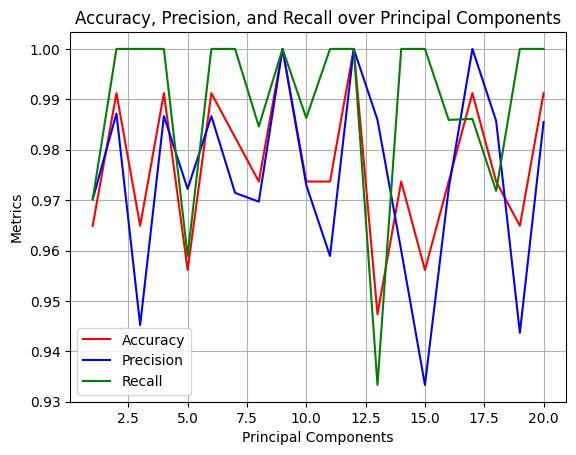

In [138]:
plt.figure()
plt.plot(range(1, K_max+1), accuracy, color = 'red', label = "Accuracy")
plt.plot(range(1, K_max+1), precision, color = 'blue', label = "Precision")
plt.plot(range(1, K_max+1), recall, color = 'green', label = "Recall")
plt.grid()
plt.xlabel('Principal Components')
plt.ylabel('Metrics')
plt.title('Accuracy, Precision, and Recall over Principal Components')
plt.legend()

In [139]:
X = cancer.data
Y = cancer.target

In [140]:
X = StandardScaler().fit_transform(X)

In [141]:
K = np.array(range(20))
K_max = 20
accuracy = np.zeros(20)
precision = np.zeros(20)
recall = np.zeros(20)

In [142]:
for k in K:

    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X)

    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, train_size = 0.8, test_size = 0.2)
    
    classifier = GaussianNB()
    classifier.fit(X_train, Y_train)

    Y_pred = classifier.predict(X_val)
    
    accuracy[k] = metrics.accuracy_score(Y_val, Y_pred)
    precision[k] = metrics.precision_score(Y_val, Y_pred)
    recall[k] = metrics.recall_score(Y_val, Y_pred)

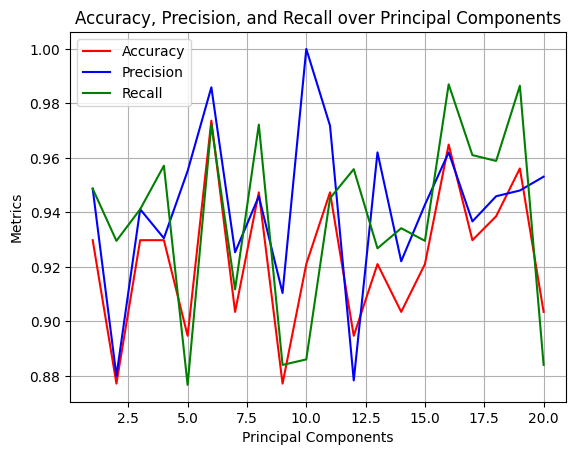

In [143]:
plt.figure()
plt.plot(range(1, K_max+1), accuracy, color = 'red', label = "Accuracy")
plt.plot(range(1, K_max+1), precision, color = 'blue', label = "Precision")
plt.plot(range(1, K_max+1), recall, color = 'green', label = "Recall")
plt.grid()
plt.xlabel('Principal Components')
plt.ylabel('Metrics')
plt.title('Accuracy, Precision, and Recall over Principal Components')
plt.legend()